In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from datetime import datetime as dt
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

<h3> Data loading and exploration </h3>

In [2]:
train = pd.read_csv('train.csv')

In [3]:
sample_sub=pd.read_csv("Sample_sub.csv")
sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [4]:
train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [6]:
train['LandingSite'].unique()

array(['LandingSite_CaptureSiteCategory_2',
       'LandingSite_CaptureSiteCategory_0',
       'LandingSite_CaptureSiteCategory_4',
       'LandingSite_CaptureSiteCategory_1',
       'LandingSite_CaptureSiteCategory_3'], dtype=object)

In [7]:
categ = pd.read_csv('CaptureSite_category.csv')
categ

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1
5,CaptureSite_13,CaptureSiteCategory_2,Type_1
6,CaptureSite_14,CaptureSiteCategory_4,Type_0
7,CaptureSite_15,CaptureSiteCategory_0,Type_0
8,CaptureSite_16,CaptureSiteCategory_4,Type_0
9,CaptureSite_17,CaptureSiteCategory_4,Type_0


In [8]:
print(categ.shape,train.shape)

(29, 3) (18062, 21)


<h3> Data cleaning </h3>

In [9]:
df = pd.merge(categ, train, on='CaptureSite', right_index=True)
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [10]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [11]:
df['ForagingGround'].value_counts()

Creek    11408
Ocean     6651
creek        3
Name: ForagingGround, dtype: int64

In [13]:
df.loc[df['ForagingGround']=='creek', 'ForagingGround']='Creek'

In [351]:
# try to find a relationship between capture site, its category, its type and the forgaging ground

# df.groupby(["CaptureSite","CaptureSiteCategory","Type","ForagingGround"]).count()['Rescue_ID']

CaptureSite     CaptureSiteCategory    Type    ForagingGround
CaptureSite_0   CaptureSiteCategory_2  Type_1  Creek                1
                                               Ocean               94
CaptureSite_1   CaptureSiteCategory_2  Type_1  Creek                6
                                               Ocean              787
CaptureSite_10  CaptureSiteCategory_2  Type_1  Creek                3
                                               Ocean              461
CaptureSite_11  CaptureSiteCategory_0  Type_0  Creek              311
                                               Ocean                1
CaptureSite_12  CaptureSiteCategory_2  Type_1  Creek               10
                                               Ocean              563
CaptureSite_13  CaptureSiteCategory_2  Type_1  Creek                2
                                               Ocean              819
CaptureSite_14  CaptureSiteCategory_4  Type_0  Creek              198
                            

In [15]:
# try to create a column with the probability of the forgaging ground, of that particular capture site, as creek
# or ocean

# df.groupby(['A','B']).B.agg('count').to_frame('c').reset_index()
# df.groupby(["CaptureSite","CaptureSiteCategory","Type","ForagingGround"]).count()
# df.groupby(["CaptureSite","CaptureSiteCategory","Type","ForagingGround"]).ForagingGround.agg('count').to_frame('c').reset_index()


In [16]:
df['TurtleCharacteristics'].nunique()

16343

In [68]:
df.dtypes

CaptureSite               object
CaptureSiteCategory       object
Type                      object
Rescue_ID                 object
Date_TimeCaught           object
Researcher                object
ForagingGround            object
CaptureMethod             object
Fisher                    object
LandingSite               object
Species                   object
Tag_1                     object
Tag_2                     object
Lost_Tags                 object
T_Number                  object
CCL_cm                   float64
CCW_cm                   float64
Weight_Kg                float64
Sex                       object
TurtleCharacteristics     object
Status                    object
ReleaseSite               object
Date_TimeRelease          object
dtype: object

**Dealing with date columns**

In [17]:
df['Date_TimeCaught'] = pd.to_datetime(df['Date_TimeCaught'], format='%Y-%m-%d')

In [18]:
df['month_caught'] = df['Date_TimeCaught'].dt.month

In [19]:
df['year_caught'] = df['Date_TimeCaught'].dt.year

In [20]:
df['week_of_year_caught'] = df['Date_TimeCaught'].dt.week

In [21]:
df['day_caught'] = df['Date_TimeCaught'].dt.day

In [22]:
df['day_of_week_caught'] = pd.DatetimeIndex(df['Date_TimeCaught']).dayofweek

In [23]:
df["year_woy"]=df.year_caught*100+df.week_of_year_caught

In [24]:
df['day_of_year']= pd.DatetimeIndex(df['Date_TimeCaught']).dayofyear

In [25]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,12,2000,51,22,4,200051,357
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,10,2001,43,28,6,200143,301
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,11,2001,44,1,3,200144,305
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,3,2002,11,11,0,200211,70
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,8,2002,32,8,3,200232,220


In [26]:
df.shape

(18062, 30)

In [28]:
df.reset_index(drop=True, inplace=True)

** Dealing with null values **

In [29]:
df.isnull().sum().sort_values(ascending=False)

T_Number                 18024
Lost_Tags                17137
Date_TimeRelease          6108
Weight_Kg                 5409
Sex                       4330
Status                    3633
ReleaseSite                 75
TurtleCharacteristics       41
CCW_cm                      27
CCL_cm                      24
Researcher                   0
Date_TimeCaught              0
LandingSite                  0
Rescue_ID                    0
Type                         0
ForagingGround               0
CaptureSiteCategory          0
CaptureMethod                0
Fisher                       0
day_of_year                  0
Species                      0
Tag_1                        0
Tag_2                        0
year_woy                     0
month_caught                 0
year_caught                  0
week_of_year_caught          0
day_caught                   0
day_of_week_caught           0
CaptureSite                  0
dtype: int64

In [30]:
del df['T_Number']
del df['Lost_Tags']

In [31]:
# df['Weight_Kg'].unique().tolist()
# df['Weight_Kg'].min()
# df['Weight_Kg'].max()

# taking the median value becuase it outlier-resistant
df['Weight_Kg'].fillna((df['Weight_Kg'].median()), inplace=True)

In [33]:
df.groupby(by = df['CaptureSite']).median()

,CCL_cm,CCW_cm,Weight_Kg,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
CaptureSite,,,,,,,,,,
CaptureSite_0,39.900,38.200,7.500,8.0,2014.0,35.0,16.0,2.0,201430.0,240.0
CaptureSite_1,39.000,36.500,7.130,7.0,2013.0,30.0,17.0,3.0,201326.0,206.0
CaptureSite_10,38.000,35.700,7.345,6.0,2016.0,24.0,15.0,3.0,201650.5,167.5
CaptureSite_11,41.600,40.135,7.500,7.0,2009.0,30.0,17.0,3.0,200914.0,204.0
CaptureSite_12,39.700,37.950,7.500,7.0,2010.0,31.0,16.0,3.0,201048.0,212.0
CaptureSite_13,39.400,37.600,7.500,8.0,2014.0,35.0,15.0,3.0,201444.0,240.0
CaptureSite_14,41.400,39.200,7.500,6.0,2013.0,26.0,18.0,4.0,201313.0,181.0
CaptureSite_15,36.500,34.000,5.785,7.0,2015.0,28.0,16.0,3.0,201503.0,197.0
CaptureSite_16,42.600,40.700,7.500,8.0,2011.0,31.0,16.0,3.0,201117.0,215.0


In [34]:
# a better approach than filling null values with the whole dataset's median would be to fill 
# in null values with each capture site's median value
df['CCL_cm'] = df['CCL_cm'].fillna(df.groupby(['CaptureSite'])['CCL_cm'].transform('median'))
df['CCW_cm'] = df['CCW_cm'].fillna(df.groupby(['CaptureSite'])['CCW_cm'].transform('median'))

In [101]:
# df2 = df[df['Date_TimeRelease']!=np.NaN]

In [93]:
# For null Date_TimeRelease values we can count the probability of Date_TimeRelease==Date_TimeCaught and if it is
# a very high value we can fill those nulll values with Date_TimeCaught
df[['Date_TimeRelease', 'Date_TimeCaught']]

,Date_TimeRelease,Date_TimeCaught
0,22/12/00,2000-12-22
1,28/10/01,2001-10-28
2,01/11/01,2001-11-01
3,11/03/02,2002-03-11
4,08/08/02,2002-08-08
...,...,...
18057,18/12/18,2018-12-18
18058,18/12/18,2018-12-18
18059,24/12/18,2018-12-24
18060,24/12/18,2018-12-24


In [91]:
# df['Date_TimeRelease'].nunique()

3008

In [35]:
df['Sex'].value_counts()

Unknown         13578
Female            113
Male               39
Not_Recorded        2
Name: Sex, dtype: int64

In [36]:
df['Sex'].fillna('Unknown', inplace=True)

In [37]:
df.loc[df['Sex']=='Not_Recorded', 'Sex']='Unknown'

In [38]:
df['Status'].value_counts()

Released                                            13610
Admitted                                              292
Not_Recorded                                           28
 green algae on carapace                                7
 no other major characteristics                         7
                                                    ...  
 white patches of calcareous algae on carapace          1
 turtle appears weak                                    1
 sm chip 10/11 RMS                                      1
 no LR flip                                             1
 hump 1 CS+ small superficial shell damage 5 CS         1
Name: Status, Length: 439, dtype: int64

In [39]:
df['Status'].fillna('Not_Recorded', inplace=True)

In [40]:
df['ReleaseSite'].value_counts()

ReleaseSite_62                                   9951
ReleaseSite_11                                   2091
ReleaseSite_18                                   1603
ReleaseSite_68                                   1596
ReleaseSite_50                                    566
                                                 ... 
 few small barnacles on carapace                    1
 notch between 9th and 10th RMS                     1
  2 lice on right eye were removed and killed       1
 notches on ??                                      1
 notch on the sixth and ninth RMS                   1
Name: ReleaseSite, Length: 271, dtype: int64

In [41]:
df['ReleaseSite'].fillna('Unknown', inplace=True)

In [42]:
df['TurtleCharacteristics'].fillna('Unknown', inplace=True)

In [43]:
df.head()

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,64.70,62.60,7.5,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,12,2000,51,22,4,200051,357
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,35.85,31.35,7.5,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,10,2001,43,28,6,200143,301
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,51.80,49.20,7.5,Unknown,clean,Released,ReleaseSite_50,01/11/01,11,2001,44,1,3,200144,305
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0031,2002-03-11,Researcher_32,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,60.50,59.00,7.5,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,3,2002,11,11,0,200211,70
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2002_RE_0118,2002-08-08,Researcher_25,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,34.70,33.00,7.5,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,8,2002,32,8,3,200232,220


<h2> Creating train and test data </h2>

In [45]:
# split Id to Year woy and CaptureSite
sample_sub["year_woy"]=(sample_sub.ID.apply(lambda x: x.split("_")[-1])).astype(int)
sample_sub["CaptureSite"]=sample_sub.ID.apply(lambda x: ("_").join(x.split("_")[0:-1]))

In [46]:
# Create Time features from Date_TimeCaught 
train["Date_TimeCaught"]=pd.to_datetime(train["Date_TimeCaught"])
print(train.Date_TimeCaught.min(),train.Date_TimeCaught.max())
train["year"]=train.Date_TimeCaught.dt.year
train["week_of_year"]=train.Date_TimeCaught.dt.weekofyear
train["year_woy"]=train.year*100+train.week_of_year

1998-04-17 00:00:00 2018-12-31 00:00:00


In [47]:
keys=pd.concat([train[["year_woy","CaptureSite"]],sample_sub[["year_woy","CaptureSite"]]])
# keys.sort_values(["CaptureSite","year_woy"],inplace=True)
CaptureSite_min_year_woy=keys.groupby("CaptureSite").year_woy.min().rename("year_woy").reset_index()
CaptureSite_min_year_woy.head()

,CaptureSite,year_woy
0,CaptureSite_0,200051
1,CaptureSite_1,200123
2,CaptureSite_10,200050
3,CaptureSite_11,199828
4,CaptureSite_12,200107


In [50]:
range_year_woy=pd.DataFrame()
range_year_woy["Date_TimeCaught"]=pd.date_range(start=train.Date_TimeCaught.min(),end=dt(2019,10,31))

In [51]:
range_year_woy["year"]=range_year_woy.Date_TimeCaught.dt.year
range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.weekofyear
range_year_woy["year_woy"]=range_year_woy.year*100+range_year_woy.week_of_year
range_year_woy.drop_duplicates(["year_woy"],inplace=True)
range_year_woy

,Date_TimeCaught,year,week_of_year,year_woy
0,1998-04-17,1998,16,199816
3,1998-04-20,1998,17,199817
10,1998-04-27,1998,18,199818
17,1998-05-04,1998,19,199819
24,1998-05-11,1998,20,199820
...,...,...,...,...
7836,2019-09-30,2019,40,201940
7843,2019-10-07,2019,41,201941
7850,2019-10-14,2019,42,201942
7857,2019-10-21,2019,43,201943


In [52]:
final_data=[]
for site , year_woy in zip(CaptureSite_min_year_woy.CaptureSite.values,CaptureSite_min_year_woy.year_woy.values) :

    one_site_df=range_year_woy[range_year_woy.year_woy>=year_woy]
    one_site_df["CaptureSite"]=site
    final_data.append(one_site_df)
final_data=pd.concat(final_data)
len(final_data)

/home/souhagaa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


28048

In [53]:
Target=train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Capture_Number").reset_index()
final_data=final_data.merge(Target,on=["year_woy","CaptureSite"],how="left")

In [54]:
# a=final_data.Capture_Number.fillna(0).value_counts(True)

In [55]:
final_data.Capture_Number.fillna(0,inplace=True)

In [56]:
# da=final_data

In [57]:
final_data[(final_data.year==2008)|(final_data.year==2009)].head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
368,2008-01-01,2008,1,200801,CaptureSite_0,0.0
369,2008-01-07,2008,2,200802,CaptureSite_0,0.0
370,2008-01-14,2008,3,200803,CaptureSite_0,0.0
371,2008-01-21,2008,4,200804,CaptureSite_0,1.0
372,2008-01-28,2008,5,200805,CaptureSite_0,0.0


In [58]:
final_data.drop(final_data[(final_data.year==2008)|(final_data.year==2009)].index, inplace=True)

In [59]:
train=final_data[final_data.year<2019]
test=final_data[final_data.year==2019]

In [60]:
test.shape

(1276, 6)

In [61]:
train['Capture_Number'].value_counts()

0.0     16535
1.0      3714
2.0      1501
3.0       783
4.0       410
5.0       234
6.0       157
7.0       142
8.0        69
9.0        56
10.0       43
11.0       25
12.0       14
13.0       14
14.0       14
16.0        5
15.0        5
17.0        2
18.0        1
19.0        1
20.0        1
23.0        1
Name: Capture_Number, dtype: int64

In [62]:
train.to_csv("final_data.csv",index=False)
test.to_csv("submission_data.csv",index=False)

In [63]:
del train
del test
del final_data
del Target

<h2> Joining data </h2>

In [64]:
df_date = pd.read_csv('final_data.csv')
df_date.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0


In [65]:
df_sub = pd.read_csv('submission_data.csv')
df_sub.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2019-01-01,2019,1,201901,CaptureSite_0,0.0
1,2019-01-07,2019,2,201902,CaptureSite_0,0.0
2,2019-01-14,2019,3,201903,CaptureSite_0,0.0
3,2019-01-21,2019,4,201904,CaptureSite_0,0.0
4,2019-01-28,2019,5,201905,CaptureSite_0,0.0


In [66]:
df_date['Date_TimeCaught'] = pd.to_datetime(df_date['Date_TimeCaught'], format='%Y-%m-%d')
df_sub['Date_TimeCaught'] = pd.to_datetime(df_sub['Date_TimeCaught'], format='%Y-%m-%d')

In [67]:
df_date['day_of_year']= pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofyear
df_sub['day_of_year']= pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofyear
df_date['month'] = df_date['Date_TimeCaught'].dt.month
df_sub['month'] = df_sub['Date_TimeCaught'].dt.month
df_date['day_of_week_caught'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofweek
df_sub['day_of_week_caught'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofweek

In [68]:
df_date['day_of_month'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).day
df_sub['day_of_month'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).day

In [69]:
df_date.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0,1,1,5,1
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0,353,12,0,18
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0,1,1,0,1
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0,8,1,0,8
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0,15,1,0,15


In [70]:
# add a season variable because turtles have a particular season where they are more likely to go out to the sand
# to lay their eggs so perhaps during those periods they are more likely to get caught??

# def season(df):
#     for i in range(df.shape[0]):
#         m = df['month']
#         d = df['day_of_month']
#         if m in (1, 2, 3):
#             if (m == 3) and ( d > 19):
#                 df['season'] = 1
#             else:
#                 df['season'] = 0
        
#         elif m in (4, 5, 6):
#             if (m ==6) and (d > 20):
#                 df['season'] = 2
#             else:
#                 df['season'] = 1

#         elif m in (7, 8, 9):
#             if (df['month'] == 9) and (df['day_of_month'] > 21):
#                 df['season'] = 3
#             else:
#                 df['season'] = 2
#         else:
#             if df['month'] == 12) and (df['day_of_month'] > 20):
#                 df['season'] = 0
#             else:
#                 df['season'] = 3

**We add the capture site category and type**

In [71]:
df_date = pd.merge(categ, df_date, on='CaptureSite', right_index=True)
df_date.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-01-01,2000,52,200052,0.0,1,1,5,1
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-12-18,2000,51,200051,1.0,353,12,0,18
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-01,2001,1,200101,0.0,1,1,0,1
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-08,2001,2,200102,0.0,8,1,0,8
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-15,2001,3,200103,0.0,15,1,0,15


In [72]:
df_sub = pd.merge(categ, df_sub, on='CaptureSite', right_index=True)
df_sub.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-01,2019,1,201901,0.0,1,1,1,1
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-07,2019,2,201902,0.0,7,1,0,7
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-14,2019,3,201903,0.0,14,1,0,14
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-21,2019,4,201904,0.0,21,1,0,21
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-28,2019,5,201905,0.0,28,1,0,28


In [73]:
# transform those categories and types to numerical values

df_date["CaptureSiteCategory"] = df_date["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_date["Type"] = df_date["Type"].str.split(pat = "_", expand=True)[1]
df_sub["CaptureSiteCategory"] = df_sub["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_sub["Type"] = df_sub["Type"].str.split(pat = "_", expand=True)[1]

In [77]:
df_date["CaptureSite_id"] = df_date["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [84]:
df_sub["CaptureSite_id"] = df_sub["CaptureSite"].str.split(pat = "_", expand=True)[1]

In [86]:
# df_date.head()
# df_sub.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month,CaptureSite_id
0,CaptureSite_0,2,1,2000-01-01,2000,52,200052,0.0,1,1,5,1,0
0,CaptureSite_0,2,1,2000-12-18,2000,51,200051,1.0,353,12,0,18,0
0,CaptureSite_0,2,1,2001-01-01,2001,1,200101,0.0,1,1,0,1,0
0,CaptureSite_0,2,1,2001-01-08,2001,2,200102,0.0,8,1,0,8,0
0,CaptureSite_0,2,1,2001-01-15,2001,3,200103,0.0,15,1,0,15,0


Let's take a look at how capture numbers vary

Text(0.5, 0, 'number of captures')

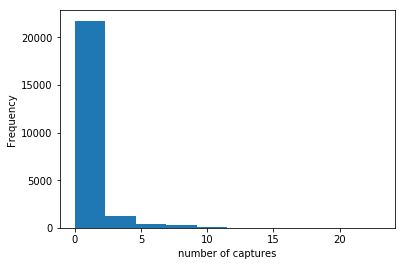

In [74]:
ax = df_date['Capture_Number'].plot(kind='hist')
plt.xlabel('number of captures')

In [87]:
df_date.corr()['Capture_Number'].sort_values(ascending=False)

Capture_Number        1.000000
year_woy              0.201067
year                  0.199772
day_of_year           0.047706
month                 0.047695
week_of_year          0.044185
day_of_month         -0.000129
day_of_week_caught   -0.010001
Name: Capture_Number, dtype: float64

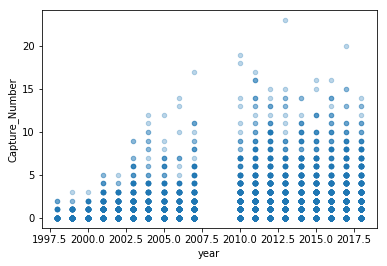

In [88]:
df_date.plot(x='year', y='Capture_Number', kind='scatter', alpha=0.3)

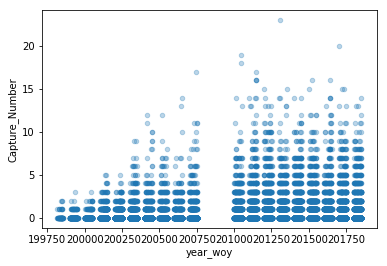

In [83]:
df_date.plot(x='year_woy', y='Capture_Number', kind='scatter', alpha=0.3)

<h2> Modeling </h2>

In [90]:
in_cols = df_date.drop(['Capture_Number','Date_TimeCaught', 'CaptureSite'], axis=1).columns
in_cols

Index(['CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'day_of_year', 'month', 'day_of_week_caught', 'day_of_month',
       'CaptureSite_id'],
      dtype='object')

In [91]:
# df_date['CaptureSite_id'].unique()

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [92]:
# df_sub['CaptureSite_id'].unique()

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [93]:
ycol = 'Capture_Number'

Let's try first a simple linear regression model

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_date[in_cols], df_date[ycol])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(df_date[ycol], lm.predict(df_date[in_cols]))))

RMSE: 1.5041142656554054


Text(0, 0.5, 'Predicted Value')

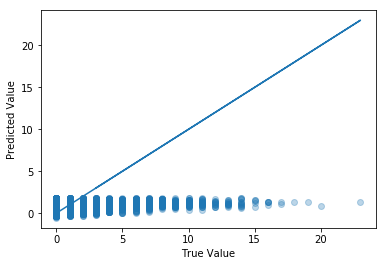

In [98]:
plt.scatter(df_date[ycol], lm.predict(df_date[in_cols]), alpha=0.3)
plt.plot(df_date[ycol], df_date[ycol]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

We can see why the model performed badly

<h3> RandomForest </h3>

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(df_date[in_cols], df_date[ycol])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
print("RMSE:", sqrt(mean_squared_error(df_date[ycol], rf.predict(df_date[in_cols]))))

RMSE: 0.46438552223704266


Text(0, 0.5, 'Predicted Value')

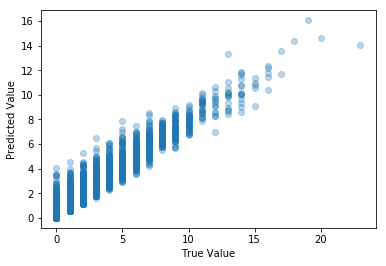

In [102]:
plt.scatter(df_date[ycol], rf.predict(df_date[in_cols]), alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
# plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

Much better! We can see that the predicted values now line up fairly closely with the true values.

**Feature importance**

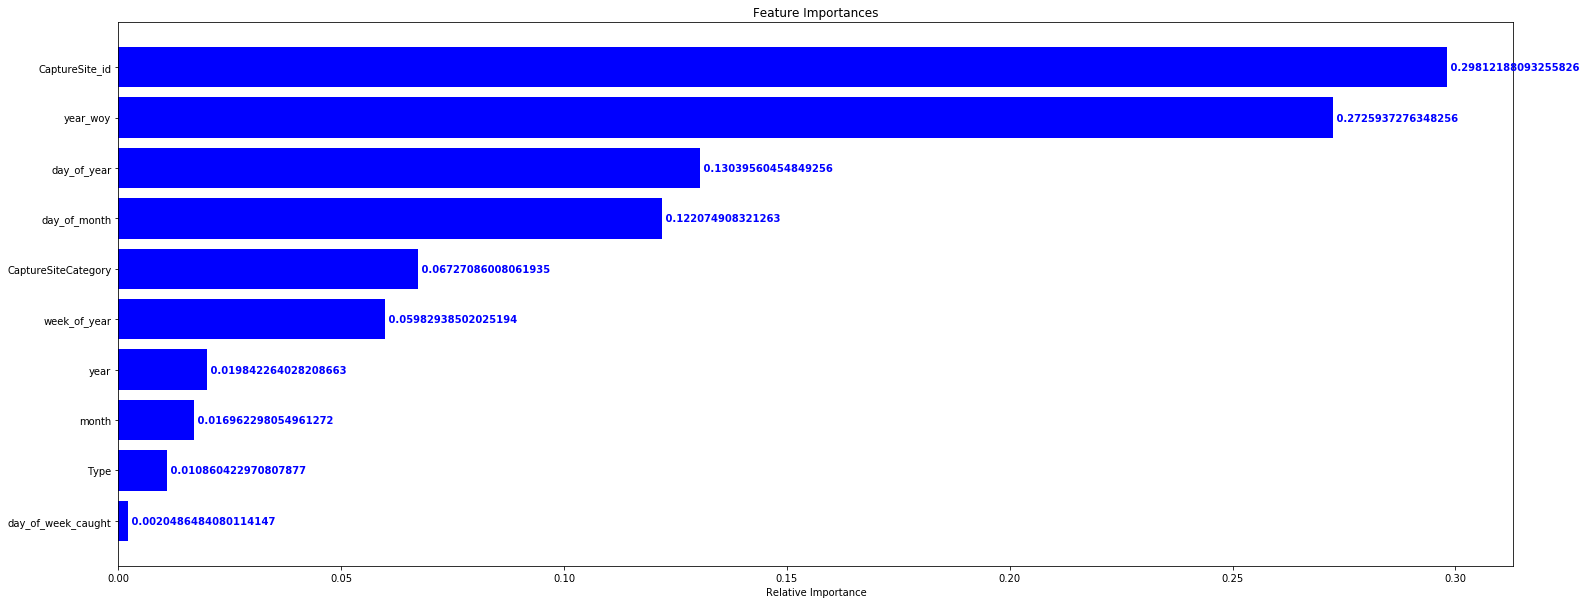

In [103]:
features = in_cols
importances = rf.feature_importances_
indices = np.argsort(importances)
# fig, ax = plt.subplots()    
plt.figure(figsize=(25,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
for i, v in enumerate(importances[indices]):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

**Using KFold to avoid overfitting**

In [105]:
from sklearn.model_selection import KFold

# Demonstrating splits
kf = KFold(n_splits=10, shuffle=False)
for train, test in kf.split(df_date):
  print(df_date.iloc[train].shape, df_date.iloc[test].shape)

(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21354, 13) (2373, 13)
(21355, 13) (2372, 13)
(21355, 13) (2372, 13)
(21355, 13) (2372, 13)


In [106]:
kf = KFold(n_splits=10, shuffle=True)

scores = []
for train, test in kf.split(df_date):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df_date[in_cols].iloc[train], df_date[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df_date[ycol].iloc[test], rf.predict(df_date[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

1.1422521207204432
1.279716720259971
1.1652759575788991
1.232179879983912
1.2109199207055634
1.2220399102940354
1.331583106426908
1.265578739031289
1.210753305430324
1.2928057517027647
Average score in 10-fold CV: 1.2353105412134109


**Some tuning of parameters**

In [107]:
for md in [5, 6, 8, 9, 10]:
    scores = []
    for train, test in kf.split(df_date):
        rf = RandomForestRegressor(n_estimators=100, max_depth=md)
        rf.fit(df_date[in_cols].iloc[train], df_date[ycol].iloc[train])
        rmse = sqrt(mean_squared_error(df_date[ycol].iloc[test], rf.predict(df_date[in_cols].iloc[test])))
        scores.append(rmse)
    print("Average score in 10-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 10-fold CV: 1.3077619362347437 for max depth: 5
Average score in 10-fold CV: 1.23879098872179 for max depth: 6
Average score in 10-fold CV: 1.202268842480556 for max depth: 8
Average score in 10-fold CV: 1.1867379893336927 for max depth: 9
Average score in 10-fold CV: 1.1909126204567764 for max depth: 10


In [109]:
rf = RandomForestRegressor(n_estimators=100, max_depth=9)
rf.fit(df_date[in_cols], df_date[ycol])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
df_sub['Capture_Number'] = rf.predict(df_sub[in_cols])

In [112]:
df_sub['ID'] = df_sub["CaptureSite"]+ "_" + df_sub["year_woy"].map(str)

In [311]:
# df_sub['Capture_Number'] = df_sub['Capture_Number'].apply(np.round).astype(int)

In [113]:
df_sub[['ID', 'Capture_Number']].to_csv('submission.csv', index=False)